In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from google.colab import drive
%matplotlib inline

In [8]:
data = '/content/drive/MyDrive/Colabs/data_two'
path_data_2d = "/content/drive/MyDrive/Colabs/data_two/data_2d.csv"
path_data_mnist = "/content/drive/MyDrive/Colabs/data_two/mnist.csv"
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [9]:
data_2d = pd.read_csv(path_data_2d)
data_mnist = pd.read_csv(path_data_mnist)

In [10]:
data_2d.head()

,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01
0,0.0,2.687848,2.366961
1,0.0,-0.201379,0.470430
2,0.0,0.608496,1.225400
3,0.0,-0.082282,1.137218
4,0.0,2.083069,2.694482


In [12]:
data_mnist.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
def kmeans_elbow_method(data):
    distortion = []
    r = range(1, 15)
    for i in r:
        kmean = KMeans(n_clusters=i, n_init=10).fit(data)
        distortion.append(kmean.inertia_)
    plt.plot(r, distortion)
    plt.grid()
    plt.show()

In [14]:
pca_data_mnist = PCA(n_components=2).fit_transform(data_mnist)

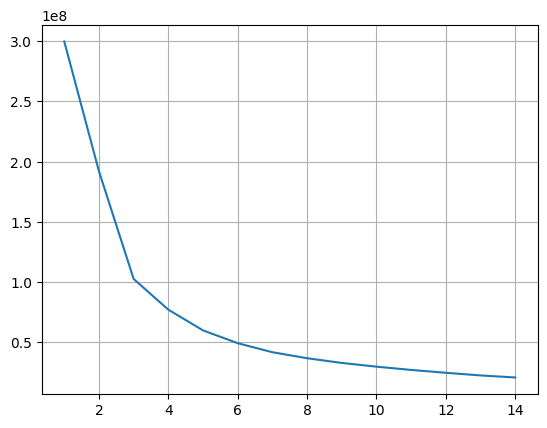

In [15]:
kmeans_elbow_method(pca_data_mnist)

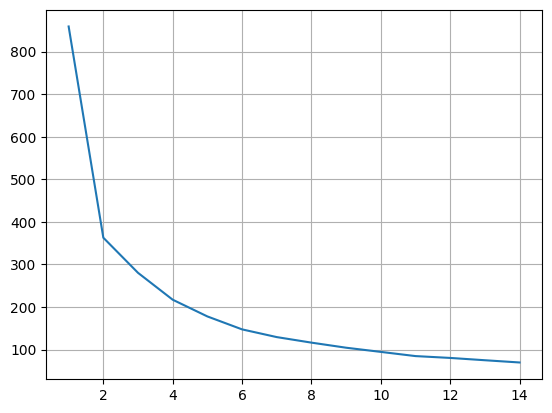

In [17]:
kmeans_elbow_method(data_2d)

In [18]:
def show_clustering(data, k):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10).fit(data)

    plt.figure(figsize=(16,8))
    sns.scatterplot(x=data[:,0], y=data[:,1], c= kmeans.labels_, cmap='cool' )
    sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], c=['black'])

In [19]:
pca_data_2d = PCA(n_components=2).fit_transform(data_2d)

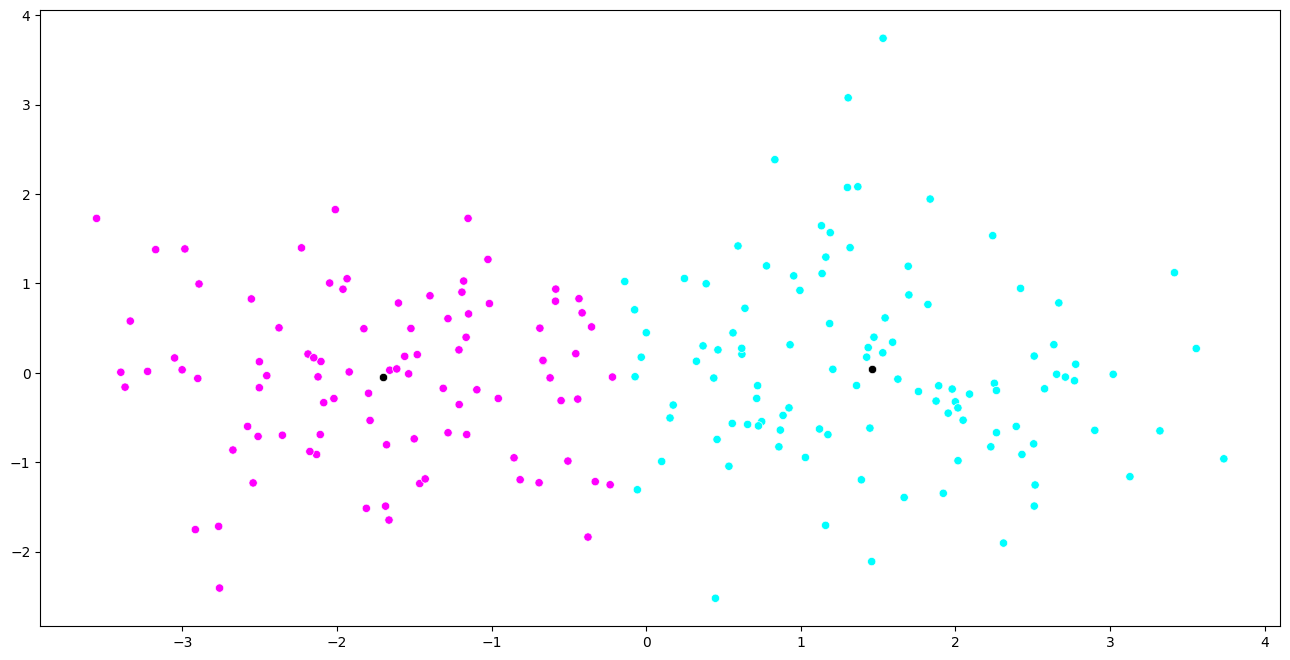

In [20]:
show_clustering(pca_data_2d, 2)

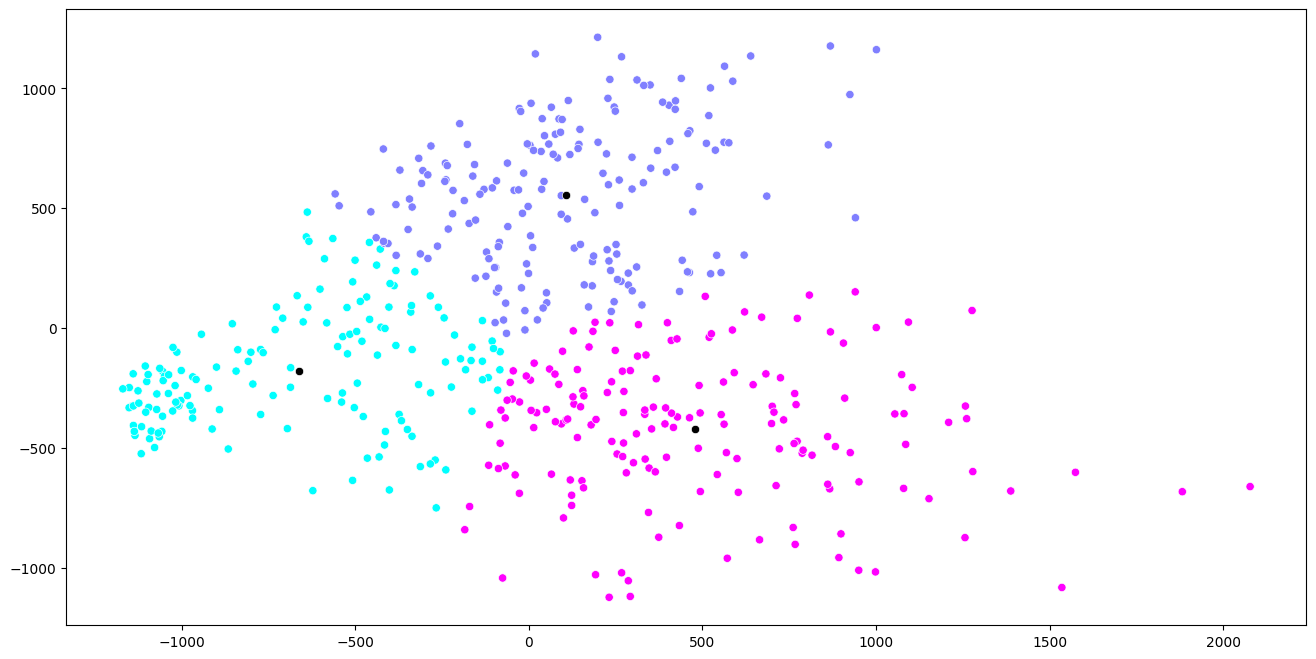

In [21]:
show_clustering(pca_data_mnist, 3)